In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

2024-07-25 23:14:45.900062: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-25 23:14:45.900183: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-25 23:14:46.055405: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Directories
base_dir = '/kaggle/input/gender-recognizer/dataset'
men_dir = os.path.join(base_dir, 'MEN')
women_dir = os.path.join(base_dir, 'WOMAN')


In [3]:
# Function to load images and labels
def load_images_and_labels(directory, label):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (128, 128)) # Resize for consistency
            images.append(img)
            labels.append(label)
    return images, labels

# Load images
men_images, men_labels = load_images_and_labels(men_dir, 0)
women_images, women_labels = load_images_and_labels(women_dir, 1)

Invalid SOS parameters for sequential JPEG


In [4]:
# Combine data
images = np.array(men_images + women_images)
labels = np.array(men_labels + women_labels)

In [5]:
# EDA
print(f"Total images: {len(images)}")
print(f"Total labels: {len(labels)}")

Total images: 1195
Total labels: 1195


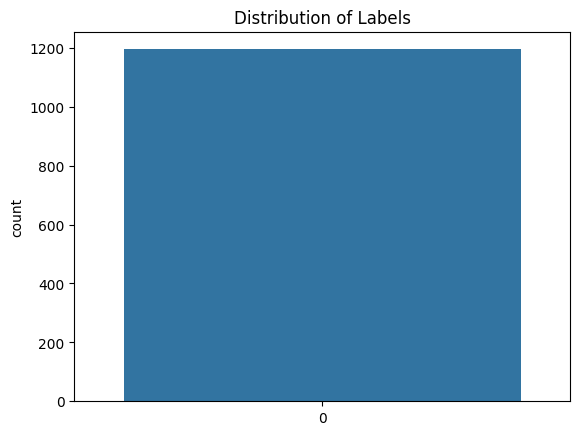

In [6]:

# Plot distribution of labels
sns.countplot(labels)
plt.title('Distribution of Labels')
plt.show()

In [7]:
# Data Preprocessing
images = images / 255.0 # Normalize images
labels = to_categorical(labels, num_classes=2) # One-hot encode labels

In [8]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [9]:

# Model Building
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,939,842 (49.36 MB)

 Trainable params: 12,939,842 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 655ms/step - accuracy: 0.5131 - loss: 2.3689 - val_accuracy: 0.5607 - val_loss: 0.6876
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 628ms/step - accuracy: 0.5919 - loss: 0.6718 - val_accuracy: 0.6192 - val_loss: 0.6501
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 638ms/step - accuracy: 0.6537 - loss: 0.6193 - val_accuracy: 0.6653 - val_loss: 0.6478
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 629ms/step - accuracy: 0.6858 - loss: 0.6058 - val_accuracy: 0.6778 - val_loss: 0.6262
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 647ms/step - accuracy: 0.7091 - loss: 0.6029 - val_accuracy: 0.6653 - val_loss: 0.5926
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 646ms/step - accuracy: 0.7009 - loss: 0.5667 - val_accuracy: 0.6485 - val_loss: 0.5953
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 627ms/step - accuracy: 0.7245 - loss: 0.5033 - val_accuracy: 0.6946 - val_loss: 0.5625
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 651ms/step - accuracy: 0.7926 - loss: 0.4621 - 

In [11]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - accuracy: 0.7599 - loss: 1.8359
Test Accuracy: 0.7615062594413757


In [12]:
# Classification report and confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step


In [13]:
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       134
           1       0.74      0.70      0.72       105

    accuracy                           0.76       239
   macro avg       0.76      0.76      0.76       239
weighted avg       0.76      0.76      0.76       239



Confusion Matrix:


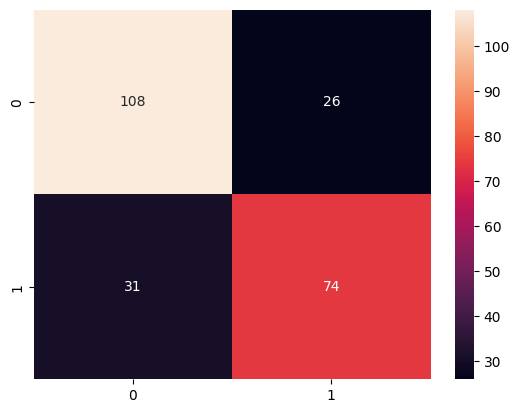

In [14]:
print("Confusion Matrix:")
cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

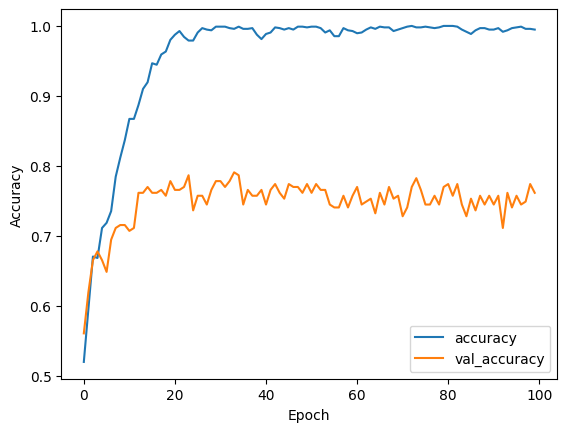

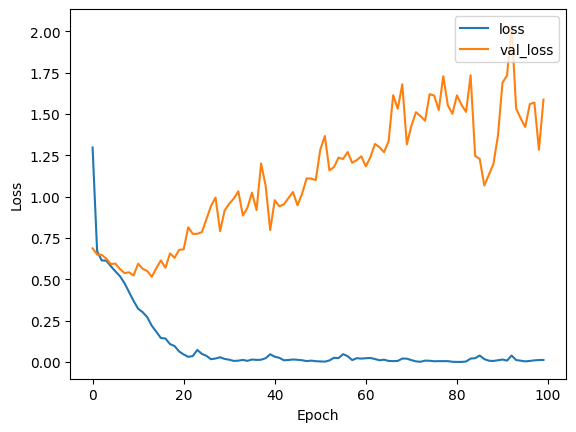

In [15]:
# Plot training history
plt.figure()
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.figure()
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

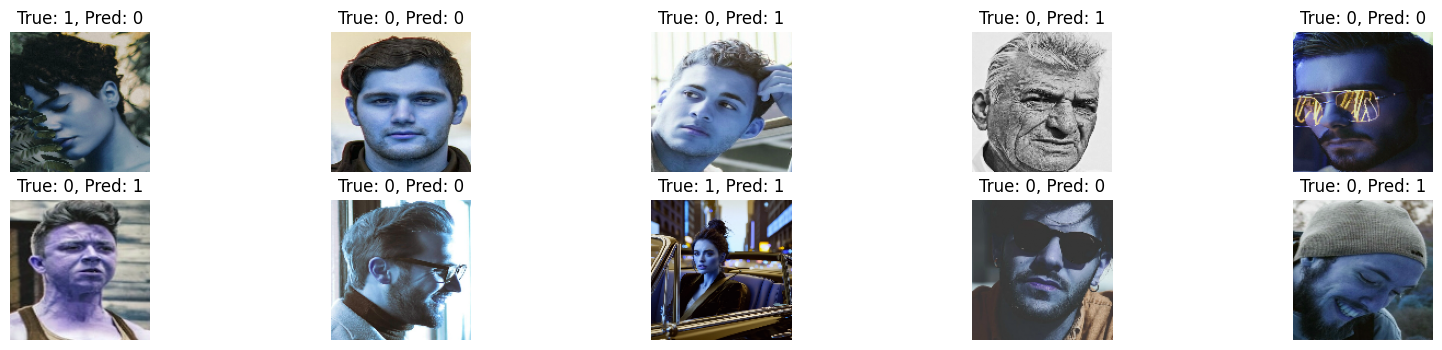

In [16]:
# Show 10 sample predictions
def plot_sample_predictions(X, y_true, y_pred, num_samples=10):
    indices = np.random.choice(range(len(X)), num_samples, replace=False)
    plt.figure(figsize=(20, 4))
    for i, idx in enumerate(indices):
        plt.subplot(2, num_samples // 2, i + 1)
        plt.imshow(X[idx])
        plt.title(f"True: {np.argmax(y_true[idx])}, Pred: {np.argmax(y_pred[idx])}")
        plt.axis('off')
    plt.show()

plot_sample_predictions(X_test, y_test, y_pred)

In [17]:
# Save the model
model.save('/kaggle/working/gender_recognition_model.h5')